In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.2.0-rc1'

In [5]:
# importing dataset

fashion_mnist = keras.datasets.fashion_mnist
(train_images ,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 17s 4us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

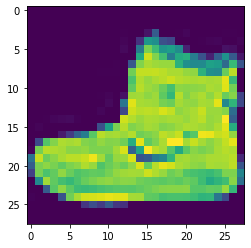

In [7]:
plt.imshow(train_images[0])

In [8]:
#noramlising

train_images = train_images / 255.0

test_images = test_images / 255.0

Text(0.5, 0, 'T-shirt/top')

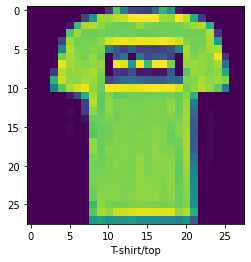

In [11]:
plt.imshow(train_images[1])
plt.xlabel(class_names[train_labels[1]])

In [13]:
# creating the model 

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28, 1)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10)
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4983 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3782 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3360 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3140 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2969 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2800 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2676 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2563 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2469 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3350 - accuracy: 0.8836

Test accuracy: 0.8835999965667725


In [24]:
# With the model trained, you can use it to make predictions about some images.
# The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, 
# which are easier to interpret.


probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

In [26]:
predictions[0]

array([1.4396873e-05, 4.1575081e-08, 5.5747722e-07, 2.2140361e-09,
       3.3231515e-07, 1.9014541e-04, 9.7740417e-07, 3.0245859e-02,
       1.1002641e-06, 9.6954656e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

Text(0.5, 0, '9')

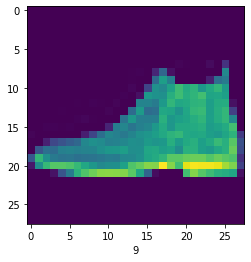

In [29]:
plt.imshow(test_images[0])
plt.xlabel(test_labels[0])